## Examining Factors Responsible for Heart Attacks

DESCRIPTION

Cardiovascular diseases are one of the leading causes of deaths globally. To identify the causes and develop a system to predict potential heart attacks in an effective manner is necessary. The data presented has all the information about relevant factors that might have an impact on cardiovascular health. The data needs to be studied in detail for further analysis.

There is one dataset data that has 14 attributes with more than 4000 data points.

You are required to determine and examine the factors that play a significant role in increasing the rate of heart attacks. Also, use the findings to create and predict a model.

**DataSet Variable Description**


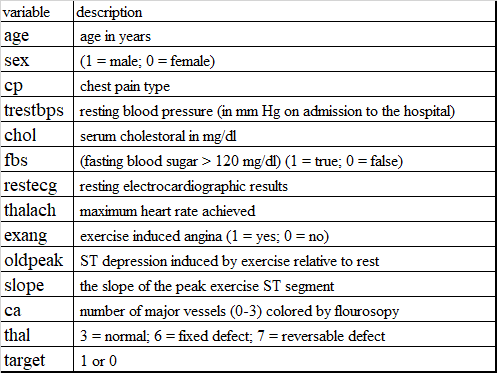

**1.Import libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

**2. Import and Understand data.**

In [2]:
df = pd.read_excel(r'F:\Programing app\Simplilearn - Data Analyst Capstone project data/Healthcare_data.xlsx')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df1 = df.copy()

In [4]:
df1.shape

(303, 14)

In [5]:
df1.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
df1.duplicated().sum()

1

In [7]:
df1.loc[df.duplicated(keep=False)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [8]:
df2 = df1.drop_duplicates()

In [9]:
df2.shape

(302, 14)

In [10]:
df2.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [11]:
df2.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [12]:
df2.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

**Performing EDA**

In [13]:
#Those data points are converted type are like categorical in nature.
# eg : sex -> 1 =male, 0=female
df2.nunique()[df2.nunique()<6]

sex        2
cp         4
fbs        2
restecg    3
exang      2
slope      3
ca         5
thal       4
target     2
dtype: int64

In [14]:
Categorical_nature = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

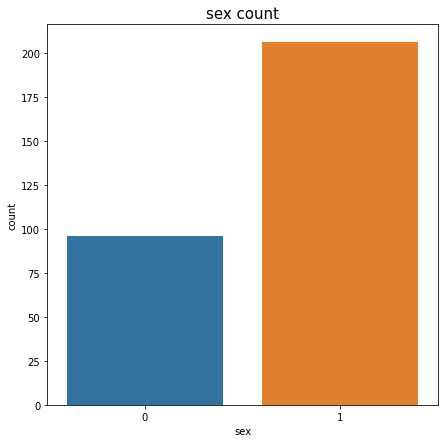

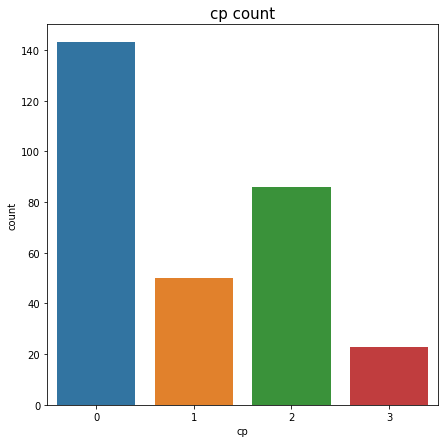

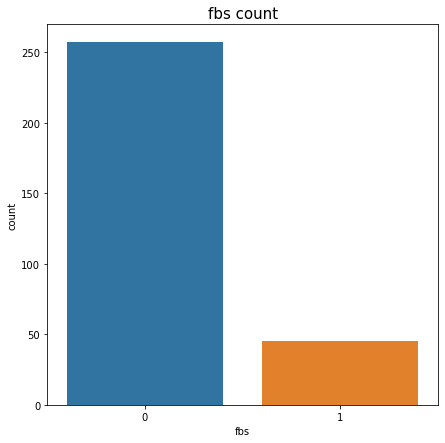

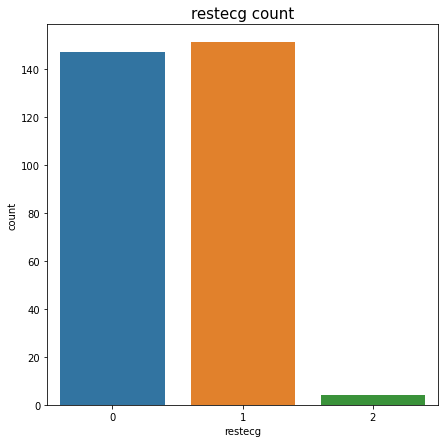

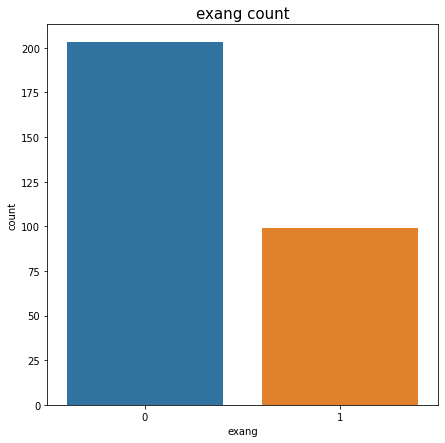

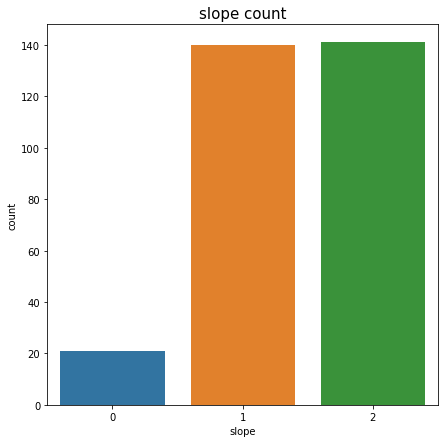

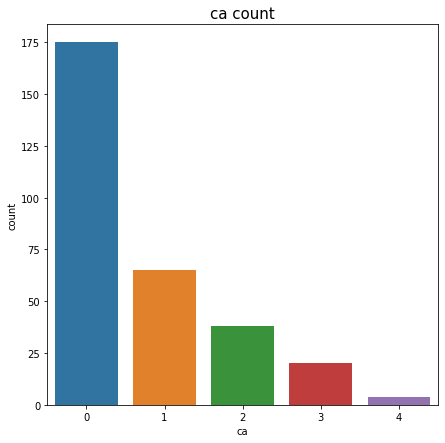

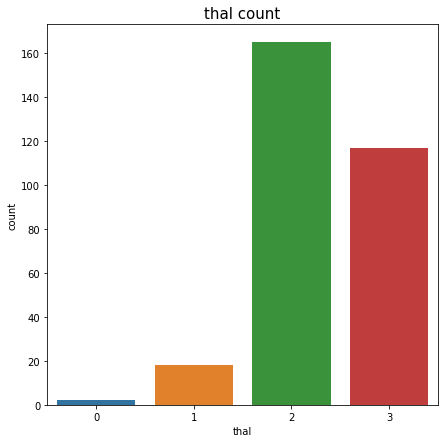

In [15]:
for col in Categorical_nature[:]:
    plt.figure(figsize=(7,7))
    sns.countplot(df2[col])
    plt.title(col+' count', fontsize = 15)
    plt.xlabel(col, fontsize = 10)
    plt.ylabel('count', fontsize=10)


#1=male, 0=female

In [16]:
#target vs age
df2.age.unique()

array([63, 37, 41, 56, 57, 44, 52, 54, 48, 49, 64, 58, 50, 66, 43, 69, 59,
       42, 61, 40, 71, 51, 65, 53, 46, 45, 39, 47, 62, 34, 35, 29, 55, 60,
       67, 68, 74, 76, 70, 38, 77], dtype=int64)

In [17]:
bins = [20,30,40,50,60,70,80]
df2['age_bins'] = pd.cut(df2['age'], bins)

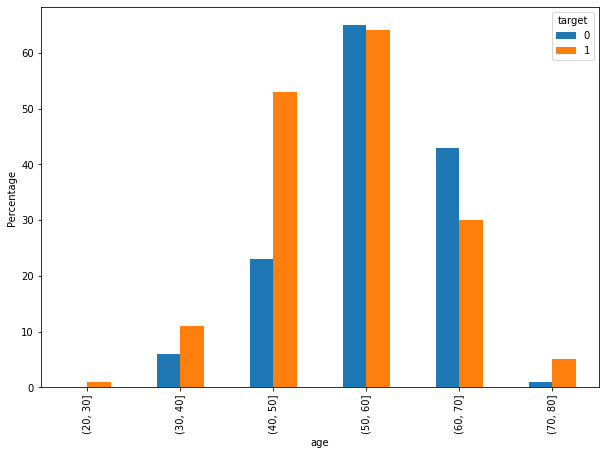

In [18]:

age_bin = pd.crosstab(df2['age_bins'], df2["target"])
age_bin.plot(kind='bar', stacked=False, figsize=(10,7))
plt.xlabel('age')
plt.ylabel('Percentage')
plt.show()

In [19]:
sorted(df2.trestbps.unique())

[94,
 100,
 101,
 102,
 104,
 105,
 106,
 108,
 110,
 112,
 114,
 115,
 117,
 118,
 120,
 122,
 123,
 124,
 125,
 126,
 128,
 129,
 130,
 132,
 134,
 135,
 136,
 138,
 140,
 142,
 144,
 145,
 146,
 148,
 150,
 152,
 154,
 155,
 156,
 160,
 164,
 165,
 170,
 172,
 174,
 178,
 180,
 192,
 200]

<AxesSubplot:ylabel='sex'>

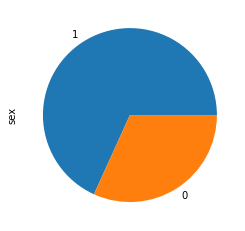

In [20]:
df2.sex.value_counts().plot(kind='pie')